$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 2: Neural Network Regression

Damian Armijo

## Overview

This assignment uses the neuralnetworksA2 class and tests if it works, then uses this class to show the ramifications on real world data. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Modified neuralnetworksA2 class testing
This section is shows that the neuralnetworkA2 class works, and how it can work on some very simplified data.

In [8]:
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(1, [10], 1)

In [9]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [10]:
[nnet.activationDerivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.070650824853164429,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.070650824853164429]

In [11]:
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.213719382757 Scale 0.00503180359645
SCG: Iteration 20 fValue Eval 0.110566264354 Scale 0.000314487724778
SCG: Iteration 30 fValue Eval 0.0882487167973 Scale 3.07116918729e-07
SCG: Iteration 40 fValue Eval 0.0677524725075 Scale 2.39935092757e-09
SCG: Iteration 50 fValue Eval 0.0213306161065 Scale 4.68623228041e-12
SCG: Iteration 60 fValue Eval 0.0101051057327 Scale 4.57639871134e-15
SCG: Iteration 70 fValue Eval 0.00679836210141 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.0042017324226 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.00156192501579 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.000465043971068 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0630 seconds. Final error is 0.021564878183482666.

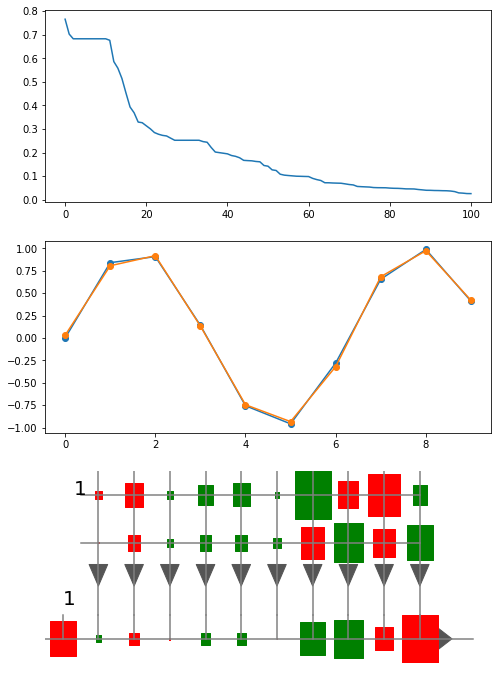

In [30]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

## Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations
This section is meant to show that using neuralnetworks, you can find different hidden layers in the data, and that the number of iterations on traing data can change the accuracy of the trained data.

### Example with Toy Data

In [13]:
import random

nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [14]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8, 1), (8, 1), (2, 1), (2, 1))

In [15]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0             1         2
0                      0  6.576544e-01  0.741180
1                    [1]  5.516960e-01  0.729745
2                 [1, 1]  5.516960e-01  0.707024
3              [1, 1, 1]  5.516960e-01  0.707024
4           [1, 1, 1, 1]  5.516960e-01  0.707024
5        [1, 1, 1, 1, 1]  5.516960e-01  0.707024
6                    [5]  3.893220e-15  0.391164
7                 [5, 5]  5.740074e-16  0.282588
8              [5, 5, 5]  2.004200e-15  0.466418
9           [5, 5, 5, 5]  1.736487e-15  0.533734
10       [5, 5, 5, 5, 5]  2.819156e-15  0.575940
11                  [10]  2.457261e-14  0.248482
12              [10, 10]  6.7

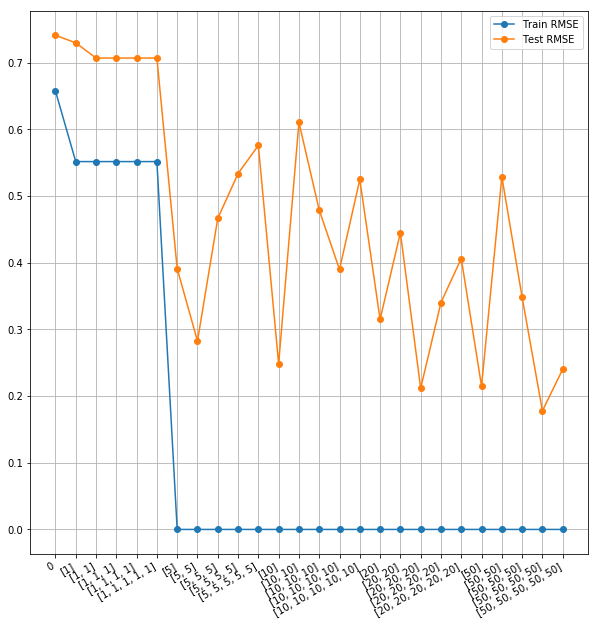

In [18]:
import pandas as pd

errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

For this data and shuffling [5,5,5] had the lowest error at 0.452351. 
The hightest error being 0.871766 for [1,1]. 
The range of rmse's for the test data was .419415. 
The median error value was 0.6325965. The above graph is used to show the hidden layer in the randomized toy data. 

[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0             1         2
0    10  5.946954e-01  0.928381
1    20  3.808722e-01  0.627618
2    50  2.491799e-01  0.486810
3   100  3.614986e-02  0.139668
4   150  8.400723e-04  0.142128
5   200  1.636293e-07  0.288094
6   250  4.258711e-09  0.313465
7   300  2.123040e-14  0.010893
8   350  5.172991e-15  0.024900
9   400  1.802457e-13  0.128854
10  450  2.495160e-08  0.150608
11  500  3.431071e-15  0.183418


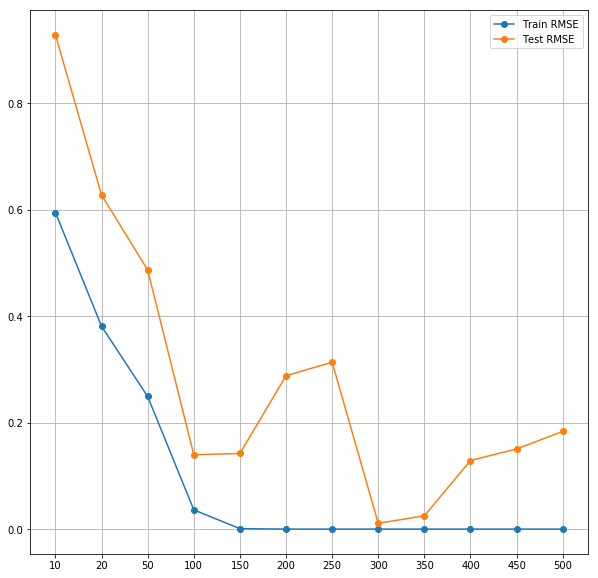

In [77]:
import pandas as pd
errors = []
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hiddens = [20,20,20,20] #[0] + [nu * nl for nu in nIterationsList for nl in [1]]

for hids in nIterationsList: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, hids)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])

errors = pd.DataFrame(errors)



print(nIterationsList)
print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) #, rotation=30, horizontalalignment='right')
plt.grid(True)

## Experiments wtih Automobile Data

The following section has:

  * cylinders,
  * displacement,
  * weight,
  * acceleration,
  * year, and
  * origin
  
as input variables, and

  * mpg
  * horsepower
  
as output variables.

This experiment uses the data found in the UCI machine learning repository. From the site itself:
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was              used in the 1983 American Statistical Association Exposition. 

In [29]:
# This is a function which goes through and parses the auto-mpg.data file, and creates an input and target set from the data file
def makeMPGData(filename='auto-mpg.data'):
    np.set_printoptions(suppress=True)

    def missingIsNan(s):
        return np.nan if s == b'?' else float(s)
    data = np.loadtxt(filename, usecols=range(8), converters={3: missingIsNan}) # This chunk of code flags the input with nan values
    goodRowsMask = np.isnan(data).sum(axis=1) == 0
    data = data[goodRowsMask,:]
    
    X = data[:,1:3]
    otherX = data[:,4:]                  # This chunk of code takes the specific input values to be trained from data[]
    X = np.hstack((X,otherX))
    
    T = data[:,0:1]
    otherT = data[:,3:4]                 # This chunk of code takes the specific Target values from data[]
    T = np.hstack((T, otherT))
    
    Xnames =  ['cylinders','displacement','weight','acceleration','year','origin']
    Tnames = ['mpg', 'horsepower']
    return X,T,Xnames,Tnames

In [30]:
# This line calls the previous method and stores the values that will be trained
X,T,Xnames,Tname = makeMPGData()

In [31]:
# This section tests that the data was read in correctly, and that it can be implemented correctly into a neuralnetwork.
print("Shape of Target data: ", T.shape)
print("Shape of Input data: ", X.shape)
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(6, [10,10,10], 2)

nnet.train(X, T, 100, verbose=True)
print(nnet)
error = np.sqrt(np.mean((T - nnet.use(X))**2))


Shape of Target data:  (392, 2)
Shape of Input data:  (392, 6)
SCG: Iteration 10 fValue Eval 0.319581555872 Scale 0.032768
SCG: Iteration 20 fValue Eval 0.0695678163508 Scale 0.002048
SCG: Iteration 30 fValue Eval 0.0554769191082 Scale 2e-06
SCG: Iteration 40 fValue Eval 0.0491042990962 Scale 1.953125e-09
SCG: Iteration 50 fValue Eval 0.0457502322038 Scale 1.9073486328125e-12
SCG: Iteration 60 fValue Eval 0.0429901277438 Scale 1.862645149230957e-15
SCG: Iteration 70 fValue Eval 0.0407927817712 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.0381856163394 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.0353111280007 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.0336666267394 Scale 1e-15
NeuralNetwork(6, [10, 10, 10], 2)
   Network was trained for 101 iterations that took 0.2380 seconds. Final error is 0.18348467712416297.


As can be seen above the neuralnetwork run with the data from the auto-mpg.data file is reasonably fast and with an error of approximately .183 after 100 iterations, it is fairly accurate. 

In [32]:
# This section of code creates a randomized training set from 80 percent of the data given, and holds 20 percent of the data
# for testing. 
import random

nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0          1          2
0                      0   9.116303   8.278992
1                    [1]  11.550993  10.072287
2                 [1, 1]  11.598937  10.114682
3              [1, 1, 1]  11.609385  10.142361
4           [1, 1, 1, 1]  11.665213   9.985124
5        [1, 1, 1, 1, 1]  11.659768  10.043450
6                    [5]   8.044378   8.035355
7                 [5, 5]   6.484632   6.627595
8              [5, 5, 5]   6.774624   7.882512
9           [5, 5, 5, 5]   5.966557   6.775443
10       [5, 5, 5, 5, 5]   5.839965   7.805763
11                  [10]   6.393580   7.406212
12              [10, 10]   4.880687   8.296487
13      

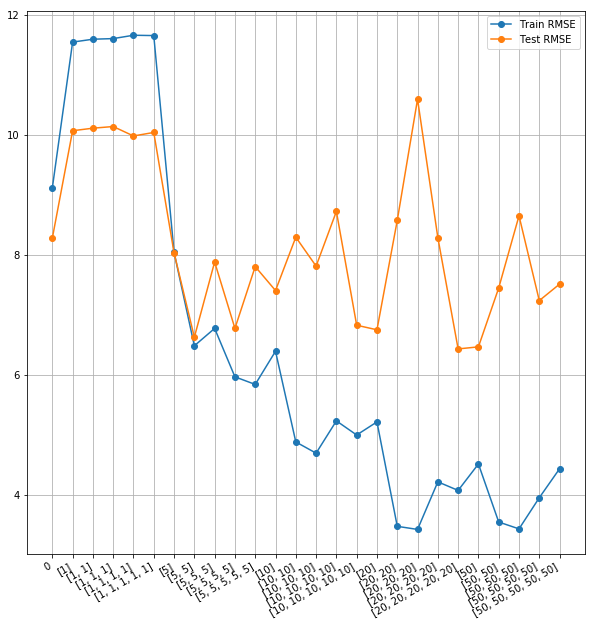

In [24]:
import pandas as pd
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
       0          1          2
0     10  12.513480  12.587926
1     20  12.723861  12.420120
2     50   8.212432   8.490825
3    100   6.885325   7.702319
4    150   6.855993   7.353538
5    200   6.766511   8.264219
6    250   6.412457   6.849129
7    300   6.748036   7.733395
8    350   6.516311   7.630922
9    400   6.425549   7.611003
10   450   6.650566   7.724207
11   500   6.285220   7.137352
12  1000   5.335658   8.007811


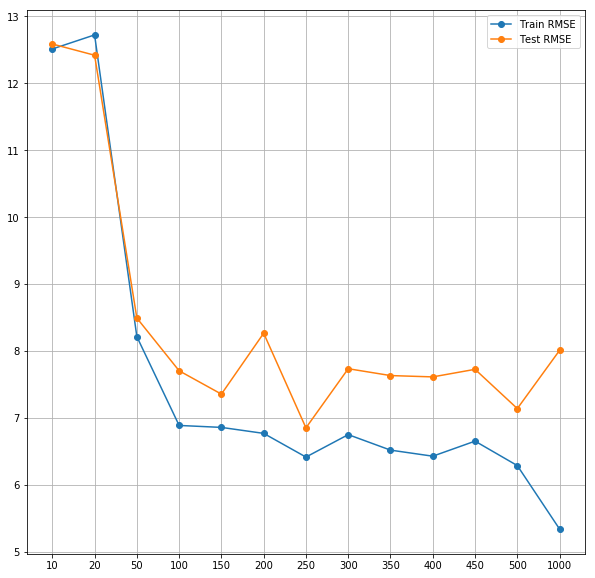

In [37]:
import pandas as pd
errors = []
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
hiddens = [5,5,5,5] 

for hids in nIterationsList: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, hids)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])

errors = pd.DataFrame(errors)

print(nIterationsList)
print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) #, rotation=30, horizontalalignment='right')
plt.grid(True)

In the original running of finding the best hidden layer, [5,5,5,5] was the best layer, and had the least error. The above graph shows the data run on this hidden layer, even though [20,20,20,20,20] was the best layer in the most recent run, it still seems to be pretty accurate in comparision to the training RMSE. 

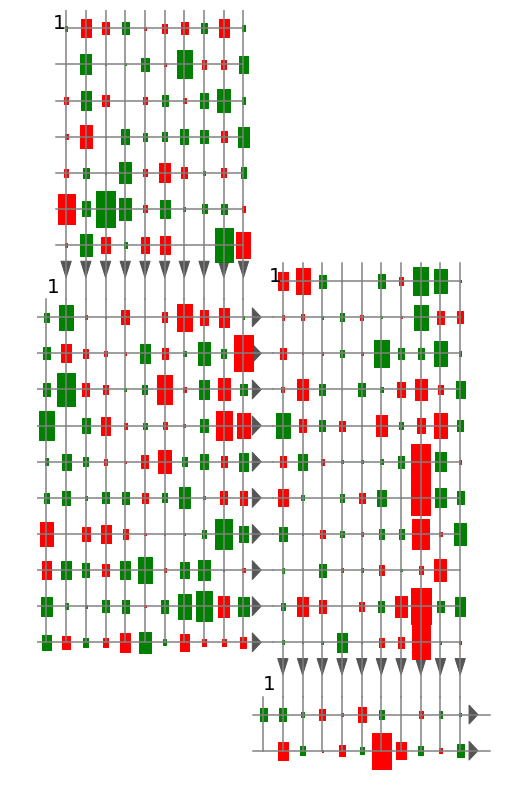

In [8]:
plt.figure(figsize=(100, 100))

plt.subplot(6,10,3)
nnet.draw()

The above mapping shows how there are 4 layers added when using a neuralnetwork and the hidden layer of [5,5,5,5]. It is very interesting to see how the data is used 

## Discussion on above training.

   I found it highly interesting to see the updated neuralnetworks class be used on real data that was collected. I found that generally running more itterations was better, but it might end up hurting the errors if there is overtraining. I also found that there are many different ways to observe the neuralnetwork and how it can be used, I particularly like the maping of the layers used in a created neuralnetwork as shown above. This drawing of the network shows which pieces have very large impacts, and which do not on the training of the data. I found that it sometimes helped to use multiple layers, and sometimes didn't. For the most part I found training on the best hidden layers though makes for a more accurate training data. Below are graphs of some further testings I did on the nnet using differing hidden layers based on the errors found in the different tested hidden layers. The graphs also test somewhat the training data with different iterations.

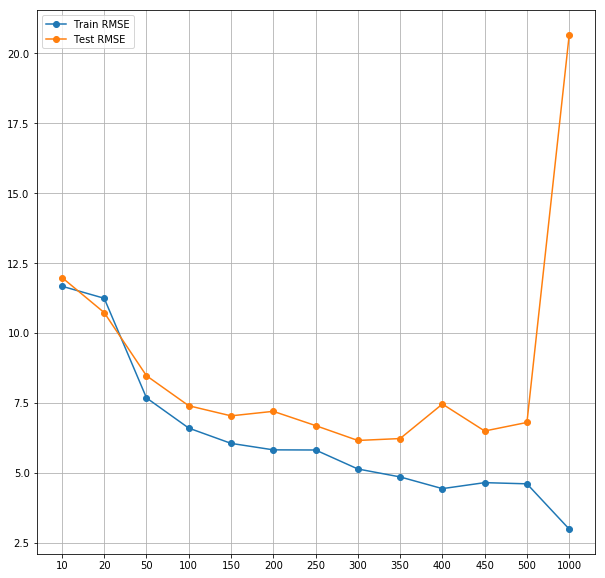
This is the auto-mpg.data being run on multiple iterations, and on the most recent best hidden layer [20,20,20,20,20]. with the exception of 400 iterations, and 1000 iterations the training seemed to be fairly accurate. 

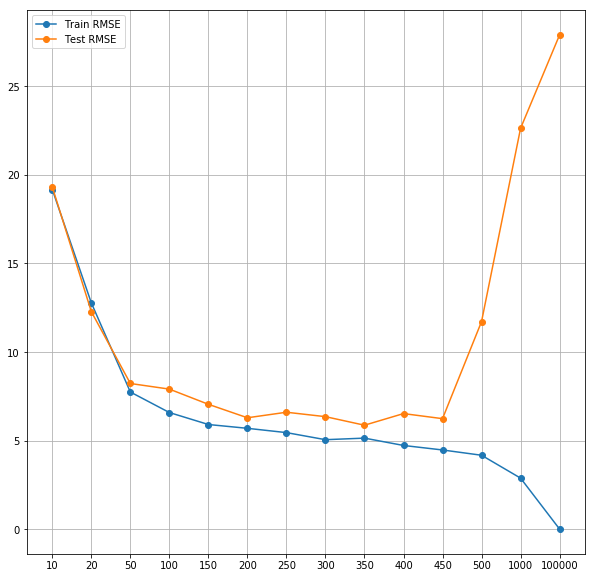
This graph is of the best hidden layer found in the data, but the final point shows the data being trained at 100000 iterations on the best layer, [20,20,20,20,20], and although for many of the iterations, the test and the train data is very close, it seems as though having my Neuralnetwork run with 100000 iterations is counter-productive, it seems that this layer eventually causes the data to be done incorrectly after many many iterations. This leads me to believe that there needs to be multi some sort of catch for training data to not be derailed. 

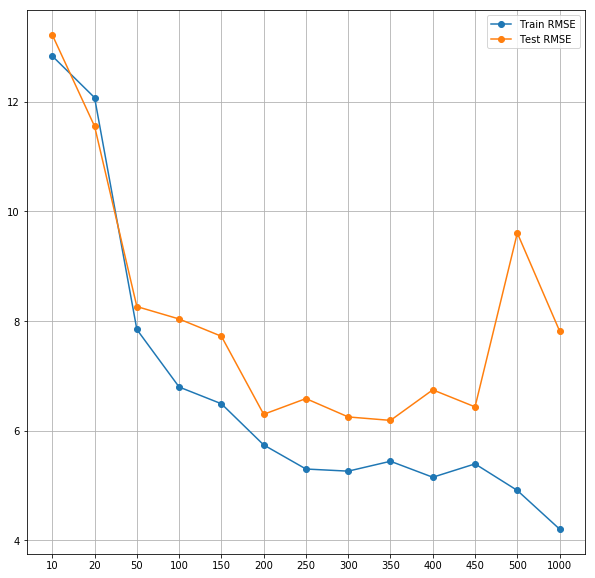
This is an example of the data being trained on a "hidden layer" of [22,8,4,8,22]. This is a random layer that I thought up, and ran on the neural network, it doesn't seem to have worked bad, but it definitely doesn't seem as good as the optimal one found from checking multiple layers against other ones. 

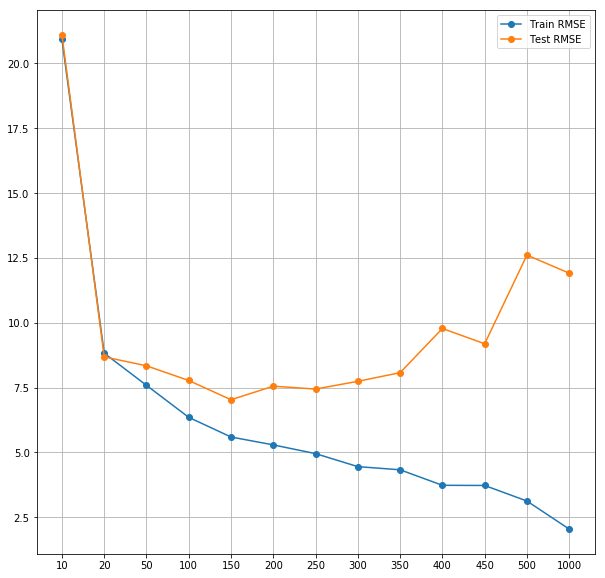
In the above graph, it shows the training data being run on the worst hidden layer [20,20,20]. It does show how the data diverges very quickly and doesn't fully correct itself even with 1000 iterations.

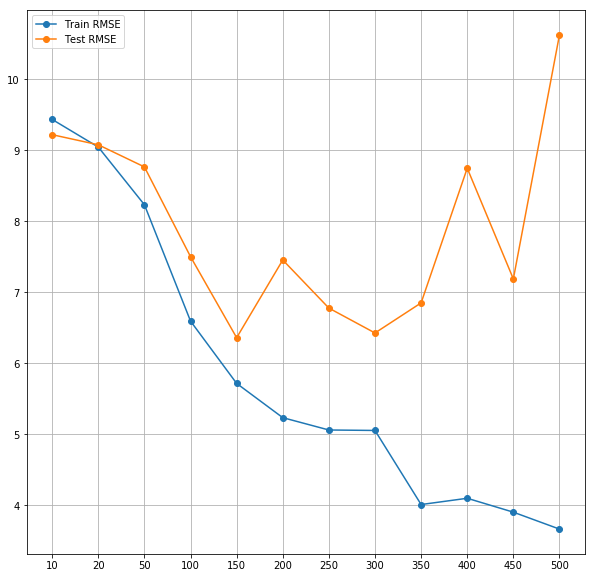
The above image shows with less iterations (only 500), what it looks like to train the worst hidden layer found in the mpg data. It is not a very great example of how a neuralnetwork can train data correctly. From iterations 10-150 the Test and Train data is very similar, but after that it seems that the test and Train data completely diverges.